# Radius Neighbors Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,3.95,3.95,3.98,3.84,3.85,20548400
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.tail()

,Adj Close,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-08-20,19.980000,19.980000,20.08,19.350000,19.790001,62983200,0,1,1,0.010622
2018-08-21,20.400000,20.400000,20.42,19.860001,19.980000,55629000,1,1,1,0.021021
2018-08-22,20.900000,20.900000,20.92,20.209999,20.280001,62002700,1,1,1,0.024510
2018-08-23,22.290001,22.290001,22.32,21.139999,21.190001,113444100,1,1,1,0.066507
2018-08-24,23.980000,23.980000,24.00,22.670000,22.910000,164328200,0,0,0,0.075819


In [5]:
X = dataset.iloc[ : , 6:8].values
y = dataset.iloc[ : , 8].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 2)
(936,)
(234, 2)
(234,)


In [8]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neigh = RadiusNeighborsRegressor(radius=1.0)
neigh.fit(X_train, y_train)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, p=2, radius=1.0,
             weights='uniform')

In [9]:
y_pred = neigh.predict(X_test)

In [10]:
y_test 

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [11]:
y_pred

array([0.49853801, 0.49853801, 0.52522255, 0.49853801, 0.45554036,
       0.45554036, 0.52294854, 0.45554036, 0.52522255, 0.52294854,
       0.52294854, 0.49853801, 0.52294854, 0.52522255, 0.52294854,
       0.45554036, 0.49853801, 0.49853801, 0.52294854, 0.49853801,
       0.45554036, 0.49853801, 0.52294854, 0.45554036, 0.52294854,
       0.52294854, 0.52294854, 0.49853801, 0.45554036, 0.45554036,
       0.52522255, 0.45554036, 0.52294854, 0.45554036, 0.49853801,
       0.45554036, 0.52294854, 0.45554036, 0.52522255, 0.45554036,
       0.52522255, 0.52294854, 0.45554036, 0.52522255, 0.45554036,
       0.49853801, 0.49853801, 0.45554036, 0.45554036, 0.49853801,
       0.49853801, 0.45554036, 0.45554036, 0.52294854, 0.52522255,
       0.45554036, 0.52294854, 0.49853801, 0.52294854, 0.52294854,
       0.45554036, 0.52522255, 0.49853801, 0.52522255, 0.52522255,
       0.45554036, 0.52522255, 0.52294854, 0.45554036, 0.49853801,
       0.52294854, 0.52294854, 0.45554036, 0.52294854, 0.52294

In [12]:
from sklearn.neighbors import KNeighborsClassifier  

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

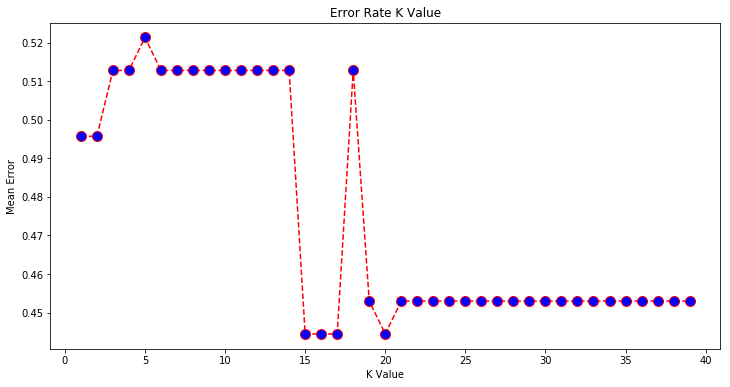

In [13]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [14]:
from sklearn.metrics import accuracy_score

for K in range(40):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  50.427350427350426 % for K-Value: 1
Accuracy is  50.427350427350426 % for K-Value: 2
Accuracy is  48.717948717948715 % for K-Value: 3
Accuracy is  48.717948717948715 % for K-Value: 4
Accuracy is  47.863247863247864 % for K-Value: 5
Accuracy is  48.717948717948715 % for K-Value: 6
Accuracy is  48.717948717948715 % for K-Value: 7
Accuracy is  48.717948717948715 % for K-Value: 8
Accuracy is  48.717948717948715 % for K-Value: 9
Accuracy is  48.717948717948715 % for K-Value: 10
Accuracy is  48.717948717948715 % for K-Value: 11
Accuracy is  48.717948717948715 % for K-Value: 12
Accuracy is  48.717948717948715 % for K-Value: 13
Accuracy is  48.717948717948715 % for K-Value: 14
Accuracy is  55.55555555555556 % for K-Value: 15
Accuracy is  55.55555555555556 % for K-Value: 16
Accuracy is  55.55555555555556 % for K-Value: 17
Accuracy is  48.717948717948715 % for K-Value: 18
Accuracy is  54.700854700854705 % for K-Value: 19
Accuracy is  55.55555555555556 % for K-Value: 20
Accuracy is  

In [15]:
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=2, p=2, radius=1.0)

In [16]:
A = neigh.kneighbors_graph(X)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])